In [221]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import math
from math import sqrt
import os
from pathlib import Path
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [222]:
# S&P 500 Consumer Discretionary

full_path = os.path.abspath(os.curdir)
stock_data_url = str(Path(full_path).parents[0])+"\datasets\Stock Data\Spark_joins/"
sp_cons_dis = "spjoin_discretionary.csv"


spdis = pd.read_csv(stock_data_url + sp_cons_dis, header=None)

spdis.columns = ["Symbol", "Name", "Date", "Daily Return", "Log Return", "Close", "Adj Close",
                 "High", "Low", "Open", "Volume","GICS Sector", "GICS Sub-Industry", 
                 "HQ City", "HQ State", "Date first added", "CIK", "Founded"]

spdis = spdis.set_index(['Date'])

spdis.head()


,Symbol,Name,Daily Return,Log Return,Close,Adj Close,High,Low,Open,Volume,GICS Sector,GICS Sub-Industry,HQ City,HQ State,Date first added,CIK,Founded
Date,,,,,,,,,,,,,,,,,
2019-11-15,AAP,Advance Auto Parts,0.000000,0.000000,162.660004,161.317993,162.690002,157.440002,157.789993,1084500.0,Consumer Discretionary,Automotive Retail,Raleigh,North Carolina,2015-07-09,1158449,1932
2019-11-18,AAP,Advance Auto Parts,0.006209,0.006190,163.669998,162.319641,164.059998,160.949997,162.850006,862900.0,Consumer Discretionary,Automotive Retail,Raleigh,North Carolina,2015-07-09,1158449,1932
2019-11-19,AAP,Advance Auto Parts,-0.010326,-0.010379,161.979996,160.643570,163.619995,161.220001,163.220001,714500.0,Consumer Discretionary,Automotive Retail,Raleigh,North Carolina,2015-07-09,1158449,1932
2019-11-20,AAP,Advance Auto Parts,-0.001482,-0.001483,161.740005,160.405563,161.960007,159.720001,161.789993,724000.0,Consumer Discretionary,Automotive Retail,Raleigh,North Carolina,2015-07-09,1158449,1932
2019-11-21,AAP,Advance Auto Parts,-0.021083,-0.021309,158.330002,157.023712,163.179993,158.199997,162.149994,635900.0,Consumer Discretionary,Automotive Retail,Raleigh,North Carolina,2015-07-09,1158449,1932


In [223]:
#Calculating annual returns and variances

returns = spdis.groupby(['Name', 'GICS Sub-Industry']).mean()*252
variances = spdis.groupby(['Name', 'GICS Sub-Industry']).std()*sqrt(252)

returns = returns['Log Return']
variances = variances['Log Return']

clusters = pd.concat([(returns), (variances)], 
                      axis = 'columns', join = 'inner')

clusters.columns = ["returns", "variances"]

clusters=clusters.reset_index()
clusters = clusters.set_index('Name')

clusters.head()


,GICS Sub-Industry,returns,variances
Name,,,
Advance Auto Parts,Automotive Retail,-0.054710,0.471841
Amazon-com Inc-,Internet & Direct Marketing Retail,0.587061,0.384036
Aptiv PLC,Auto Parts & Equipment,0.174509,0.748234
AutoZone Inc,Specialty Stores,-0.013817,0.420143
Best Buy Co- Inc-,Computer & Electronics Retail,0.393853,0.519512


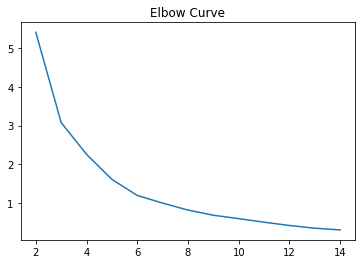

In [224]:
# Determining number of clusters

X= clusters[['returns', 'variances']].values #converting into numpy array
sse =[]
for k in range (2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
pl.plot(range(2,15),sse)
pl.title("Elbow Curve")
pl.show()

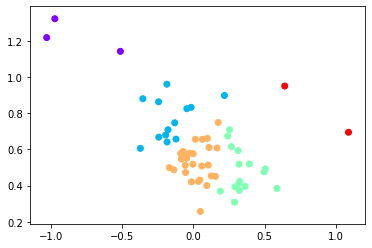

In [225]:
# Plotting clusters

kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0], X[:,1],c = kmeans.labels_,cmap="rainbow")
pl.show()

In [238]:
# Creating datafrane with companies and corresponding cluster

print(centroids)

Company = pd.DataFrame(clusters.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df=pd.concat([Company,cluster_labels],axis=1)
df.columns = ["Name","Group"]
df=df.set_index(['Name'])
df.head()

[[-0.83846194  1.22677243]
 [-0.15776213  0.76616108]
 [ 0.34298055  0.47820574]
 [ 0.01845584  0.52844165]
 [ 0.86603084  0.82199809]]


,Group
Name,
Advance Auto Parts,3
Amazon-com Inc-,2
Aptiv PLC,3
AutoZone Inc,3
Best Buy Co- Inc-,2


In [239]:
#Dataset for visualization

combined = pd.concat([(clusters), (df)], 
                      axis = 'columns', join = 'inner')
combined.head()
combined.to_csv (r'..\data-analysis\consumer_discretionary_groups.csv',header=True)

In [240]:
# Counts and Filters

print(df.groupby("Group").count() )
df.loc[df["Group"] == 2]


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


,Group
Name,
Amazon-com Inc-,2
Best Buy Co- Inc-,2
Chipotle Mexican Grill,2
D- R- Horton,2
Dollar General,2
Domino's Pizza,2
Expedia Group,2
Garmin Ltd-,2
Lennar Corp-,2
